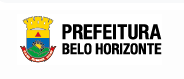

**Neste trabalho iremos explorar o dataset do governo de Minas Gerais do ano de 2021 com acidentes de trânsito com vítimas ocorridos em Belo Horizonte**

# Descrição dos passos seguidos nesta a tividade

In [ ]:
# Passo 1: Instalar bibliotecas
# passo 2: Importar base de dados
# Passo 3: Leitura e vizualização da base de dados
# Passo 4: Corrigir erros da base de dados
# Passo 5: Análise dos dados
# Passo 6: Graficos Informativos


# Passo 1: Instalar bibliotecas

In [ ]:
!pip install pandas numpy openpyxl nbformat ipykernel plotly seaborn

# Passo 2: Importar Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionario de Dados

In [ ]:
dataset = pd.read_csv("acidente-transito.csv", sep=';', encoding='latin-1')

display(dataset)

#Passo 3: Leitura e vizualização da base de dados

In [ ]:
tabela = pd.read_csv("acidente-transito.csv", sep=';', encoding='latin-1')


display(tabela)

# Passo 4: Corrigir erros da base de dados

> Corrigindo valores vazios

> Excluindo linhas vazias

> Excluindo colunas desnecessarias

In [ ]:
# Visualizar informações antes das operações
display(tabela.info())

#Remover espaços em branco dos nomes das colunas
tabela.columns = tabela.columns.str.strip()

# Remover linhas com valores ausentes e colunas específicas
tabela = tabela.dropna()
tabela = tabela.drop(columns=["Nº_boletim", "seq_veic"])

# Visualizar informações após as operações
display(tabela.info())

# Passo 5: Análise dos dados

```
 Neste passo analizamos os dados frente a perguntas norteadoras, a quais foram elas:

 ```

 > Que tipo de socorro teve sua maior incidencia no ano de 2021?

 > Qual foi a espécie de veículo com maior número de acidentes neste ano?

 > Qual a situação do veiculo mais comum no ano analisado?

 > Qual foi o horário que teve o maior número de acidentes?


In [ ]:
tipo_socorro_mais_comum = tabela['desc_tipo_socorro'].mode().values[0]
print("\nTipo de socorro mais comum:", tipo_socorro_mais_comum)

veiculo_mais_comum = tabela['descricao_especie'].mode().values[0]
print("\nVeículo que mais ocorreu acidente:", veiculo_mais_comum)

situacao_veiculo_mais_comum = tabela['desc_situacao'].mode().values[0]
print("\nSituação em que o veículo estava:", situacao_veiculo_mais_comum)

horario_mais_ocorrido = tabela['data_hora_boletim'].str.split().str[1].str.split(':').str[0].astype(int).mode().values[0]
print("\nHorário que mais ocorreu acidente:", horario_mais_ocorrido, "horas")

# Passo 6: Graficos Informativos

## Nesta sessão iremos construir graficos informativos para uma melhor elucidação das perguntas norteadoras.

In [ ]:
# Dados para o gráfico
tipos_socorro = tabela['desc_tipo_socorro'].value_counts()
veiculos = tabela['descricao_categoria'].value_counts()
situacoes_veiculo = tabela['desc_situacao'].value_counts()

# Plotar gráficos de barras
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

axs[0, 0].bar(tipos_socorro.index, tipos_socorro.values, color='skyblue')
axs[0, 0].set_title('Tipos de Socorro')
axs[0, 0].set_ylabel('Quantidade')
axs[0, 0].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x

axs[0, 1].bar(veiculos.index, veiculos.values, color='salmon')
axs[0, 1].set_title('Veículos Envolvidos')
axs[0, 1].set_ylabel('Quantidade')
axs[0, 1].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x

axs[1, 0].bar(situacoes_veiculo.index, situacoes_veiculo.values, color='lightgreen')
axs[1, 0].set_title('Situação dos Veículos')
axs[1, 0].set_ylabel('Quantidade')
axs[1, 0].tick_params(axis='x', rotation=45)  # Rotaciona os rótulos do eixo x

# Remover o último subplot
fig.delaxes(axs[1,1])

plt.tight_layout()
plt.show()

In [ ]:
especie_count = tabela['descricao_especie'].value_counts()

especie_perc = 100. * especie_count / especie_count.sum()

especie_filtrado = especie_perc[especie_perc >=1.7  ]

# Gerar o gráfico de pizza
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(especie_filtrado, autopct='%1.1f%%', startangle=140)

ax.legend(wedges, especie_filtrado.index,
          title="descricao_especie",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(texts, rotation_mode="anchor", ha="right")

plt.title('Distribuição de descricao_especie (acima de 1.7%)')
plt.show()


# Discussão:

## Com a analise dos dados supracitados, podemos observar que meios de locomoção da especie Automovel, tem a maior parcela no numero de acidentes com vitimas no ano de 2021, onde em sua maioria os acidentes ocorreram com automiveis particulares e que estavam em movimento.Seguido por motocicletas onde se somados (automoveis e motocicletas) detem mais de 80% do numero de acidentes com vitima ocorridos no ano de 2021 na cidade de Belo horizonte.